In [32]:
%autosave 60

Autosaving every 60 seconds


In [61]:
%matplotlib inline

## MT4でダウンロードしたHistorical Dataをリードする

In [90]:
# 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# MT4のhistory Dataを取得する。
dataM1 = pd.read_csv('D:\\temp\\AUDJPY1.csv', sep=',',names=('Date','Time','Open','High','Low','Close','volume'))
DateTime = dataM1['Date']+" "+dataM1['Time']
dataM1['DateTime'] = DateTime
print(type(dataM1['DateTime'][0]))
# 文字列をDateTime型に変換する
dataM1['DateTime'] = pd.to_datetime(dataM1['DateTime'],format='%Y.%m.%d %H:%M')
print(type(dataM1['DateTime'][0]))
# drop=True で旧インデックスを表から削除する
# inplace=True でオブジェクトを直接書き換える
dataM1.set_index('DateTime',drop=True,inplace=True)
# 不要なデータを削除する
del dataM1['Date']
del dataM1['Time']
del dataM1['volume']
# 
Close = dataM1['Close']
dataM1.head()

<class 'str'>
<class 'pandas._libs.tslib.Timestamp'>


,Open,High,Low,Close
DateTime,,,,
2018-12-06 13:30:00,81.215,81.216,81.207,81.210
2018-12-06 13:31:00,81.208,81.211,81.202,81.207
2018-12-06 13:32:00,81.207,81.209,81.198,81.205
2018-12-06 13:33:00,81.205,81.209,81.194,81.202
2018-12-06 13:34:00,81.201,81.211,81.200,81.208


In [94]:
# IMA関数
def iMA(df,ma_period,ma_shift=0,ma_method='SMA',applied_price='Close'):
    if ma_method == 'SMA':
        return df[applied_price].rolling(ma_period).mean().shift(ma_shift)
    elif ma_method == 'EMA':
        return df[applied_price].ewm(span=ma_period).mean().shift(ma_shift)
    elif ma_method == 'SMMA':
        return df[applied_price].ewm(alpha=1/ma_period).mean().shift(ma_shift)
    elif ma_method == 'LWMA':
        y = pd.Series(0.0, index=df.index)
        for i in range(len(y)):
            if i<ma_period-1:
                y[i] = 'NaN'
            else:
                y[i] = 0
                for j in range(ma_period):
                    y[i] += df[applied_price][i-j]*(ma_period-j)
                y[i] /= ma_period*(ma_period+1)/2
        return y.shift(ma_shift)
    else:
        return df[applied_price].copy().shift(ma_shift)
# 
FastMA = iMA(dataM1,25)
SlowMA = iMA(dataM1,75)
MA = pd.DataFrame({'Close':Close, 'FastMA':FastMA, 'SlowMA':SlowMA},columns=['Close','FastMA','SlowMA'])
MA.tail()

,Close,FastMA,SlowMA
DateTime,,,
2018-12-21 23:45:00,78.276,78.32428,78.355627
2018-12-21 23:46:00,78.267,78.32032,78.354120
2018-12-21 23:47:00,78.263,78.31644,78.352547
2018-12-21 23:48:00,78.235,78.31124,78.350587
2018-12-21 23:49:00,78.232,78.30604,78.348653


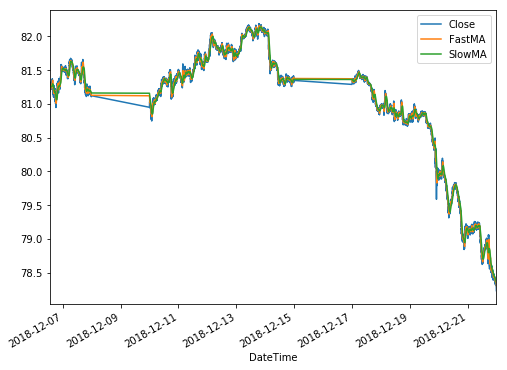

In [95]:
pd.DataFrame({'Close':Close, 'FastMA':FastMA, 'SlowMA':SlowMA},columns=['Close','FastMA','SlowMA']).plot(figsize=(8,6))


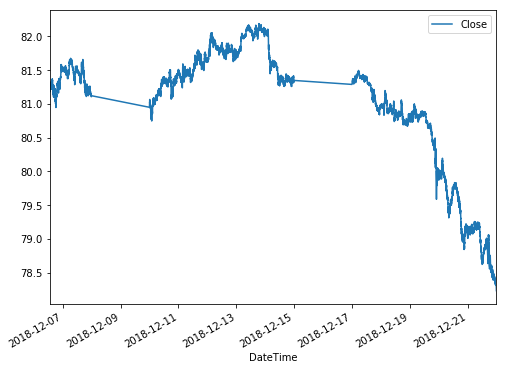

In [96]:
Close = dataM1['Close']
pd.DataFrame({'Close':Close},columns=['Close']).plot(figsize=(8,6))